This notebooko demonstrates the basic use of the optical depth class and how to load a model included in the package

In [1]:
%matplotlib inline

# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ebltable.tau_from_model import OptDepth

# Initiate the class plot an example

The easiest way is to import the attenuation from an EBL model. Available models are:

| EBL model id | Model ref.   | Web link |
|------|------|------|
|   dominguez  | Dominguez et al. (2012) | |
|   dominguez-upper  | Dominguez et al. (2012) | upper uncertainty bound|
|   dominguez-lower  | Dominguez et al. (2012) | lower uncertainty bound|
|   franceschini  | Franceschini et al. (2008) |http://www.astro.unipd.it/background/ |
|   finke | Finke et al. (2012) | http://www.phy.ohiou.edu/~finke/EBL/ |
|   finke2022 | Finke et al. (2022) | https://zenodo.org/record/702307 |
| saldana-lopez     |   Saldana-Lopez et al. (2021) | https://www.ucm.es/blazars/ebl | 
| saldana-lopez-err  |  Saldana-Lopez et al. (2021) uncertainties | https://www.ucm.es/blazars/ebl |
| kneiske | Kneiske & Dole (2010) | |
| gilmore | Gilmore et al. (2012)	|	fiducial model |
| gilmore-fixed | Gilmore et al. (2012)	|	fixed model |
| inoue | Inuoe et al. (2013)	| http://www.slac.stanford.edu/~yinoue/Download.html |
| inoue-low-pop3 | Inuoe et al. (2013)	| Low pop 3 contribution http://www.slac.stanford.edu/~yinoue/Download.html |
| inoue-up-pop3 | Inuoe et al. (2013)	| High pop 3 contribution http://www.slac.stanford.edu/~yinoue/Download.html |

In [3]:
tau =  OptDepth.readmodel(model='finke2022')

Define some redshifts and energies for the interpolation:

In [4]:
z = np.arange(0.004,0.6,0.1)
ETeV = np.logspace(-1,2,50)

For each redshift, calculate the energy where $\tau = 1$:

In [5]:
Etau1GeV = []
for i,zz in enumerate(z):
    Etau1GeV.append(tau.opt_depth_inverse(zz,1.))

Calculate the attenuation:

In [6]:
atten = np.exp(-1. * tau.opt_depth(z,ETeV))

### Do the plot

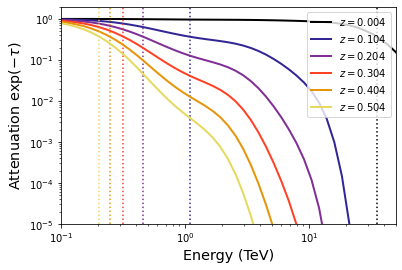

In [7]:
for i,zz in enumerate(z):
    plt.loglog(ETeV,atten[i],
              ls = '-', color = plt.cm.CMRmap(i / float(len(z))),
              label = '$z = {0:.3f}$'.format(zz), lw = 2)
    plt.axvline(Etau1GeV[i] / 1e3, ls=':', color = plt.cm.CMRmap(i / float(len(z))) )

plt.gca().set_ylim((1e-5,2.))
plt.gca().set_xlim((1e-1,5e1))
plt.gca().set_xlabel('Energy (TeV)',size = 'x-large')
plt.gca().set_ylabel(r'Attenuation $\exp(-\tau)$',size = 'x-large')
plt.legend(loc = 'upper right')

# Compare models

In [8]:
tau = {}
for m in OptDepth.get_models():
    tau[m] = OptDepth.readmodel(m)

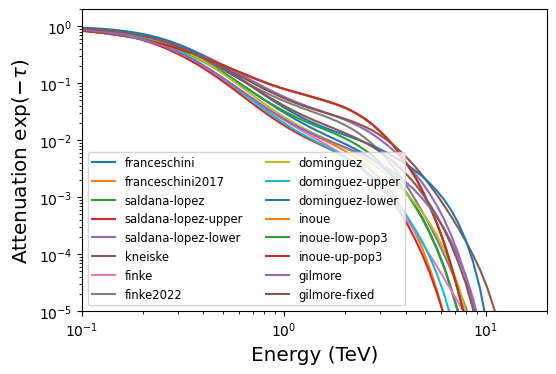

In [9]:
plt.figure(dpi=100)

ETeV = np.logspace(-2, 1.5,100)
z = 0.3


for m, t in tau.items():
    plt.loglog(ETeV, np.exp(-t.opt_depth(z, ETeV)), label=f"{m}")
               
plt.gca().set_ylim((1e-5,2.))
plt.gca().set_xlim((1e-1,2e1))
plt.gca().set_xlabel('Energy (TeV)',size = 'x-large')
plt.gca().set_ylabel(r'Attenuation $\exp(-\tau)$',size = 'x-large')
plt.legend(loc='lower left', ncol=2, fontsize='small')